In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['Churn_Modelling.csv']


In [2]:
df = pd.read_csv("../input/Churn_Modelling.csv", header = 0, index_col=0)
print(df.shape)
df.head()

(10000, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
len(df.CustomerId.unique())

10000

In [4]:
source_data = df.copy()

df.drop("CustomerId", axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)

df.Geography = df.Geography.astype('category')
df.Gender = df.Gender.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null category
Gender             10000 non-null category
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: category(2), float64(2), int64(7)
memory usage: 801.0 KB


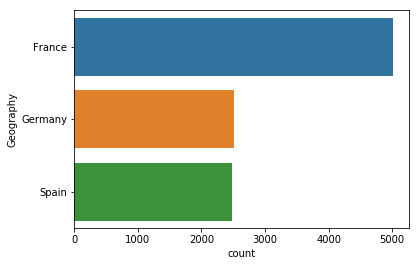

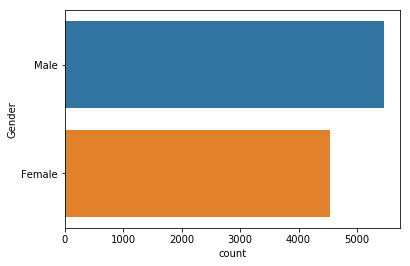

In [5]:
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

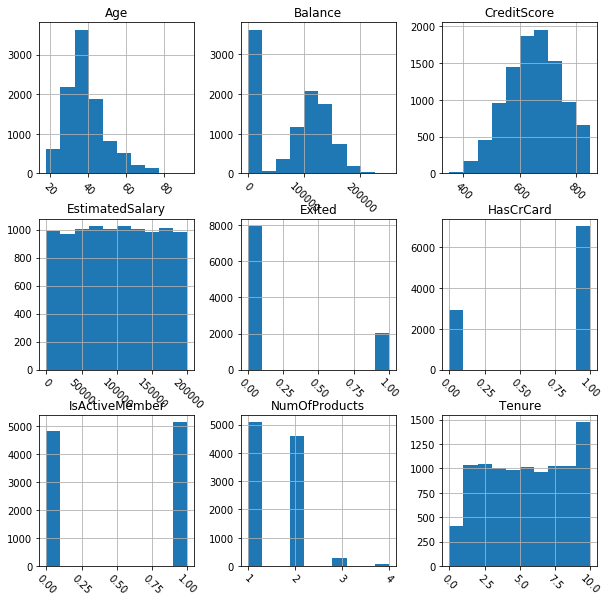

In [6]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

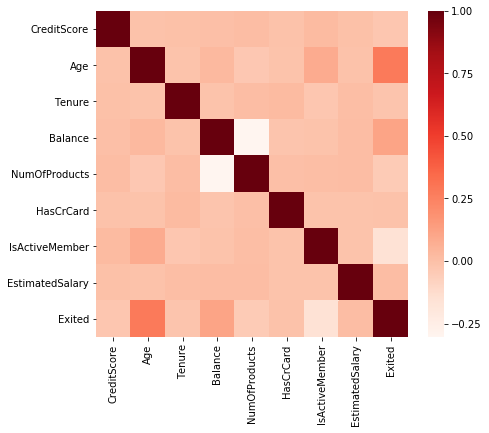

In [7]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), cmap="Reds")

Data is imbalanced

In [8]:
len(df[df.Exited == 1].index)/10000

0.2037

Some features correlate a bit

In [9]:
df.corr().at['Age', 'Exited']

0.2853230378350968

In [10]:
df.corr().at['Balance', 'NumOfProducts']

-0.3041797383605498

In [11]:
df.corr().at['IsActiveMember', 'Exited']

-0.15612827818891764

In [12]:
df2 = pd.get_dummies(df, drop_first=True)
x = df2.drop("Exited", axis=1)
y = df2.Exited

In [13]:
X = (x-np.min(x))/(np.max(x)-np.min(x))

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Logistic  Regression

In [16]:
logreg_model = LogisticRegression(solver='liblinear')
logreg_selector = RFECV(estimator=logreg_model, step=1, cv=10)
fit = logreg_selector.fit(X_train, y_train)

In [17]:
print ('The selected features are: ' + '{}'.format([feature for feature,s in zip(X.columns, fit.support_) if s]))

The selected features are: ['Age', 'IsActiveMember', 'Geography_Germany']


In [18]:
print('Mean of grid scores: ' + '{}'.format(fit.grid_scores_.mean()))
print('R2 score: ' + '{}'.format(fit.score(X_test,y_test)))
print('ROC AUC Score: ' +'{}'.format( roc_auc_score(y_test, fit.predict_proba(X_test)[::,1])))
confusion_matrix(y_test, fit.predict(X_test))

Mean of grid scores: 0.8054426836757659
R2 score: 0.8176666666666667
ROC AUC Score: 0.7511355495763811


array([[2351,   61],
       [ 486,  102]])

Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf_fit = rf.fit(X_train, y_train)

print(rf_fit.score(X_test,y_test))
confusion_matrix(y_test, rf_fit.predict(X_test))

0.8643333333333333


array([[2315,   97],
       [ 310,  278]])

Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100)
gb_fit = gb.fit(X_train, y_train)

print(gb_fit.score(X_test,y_test))
confusion_matrix(y_test, gb_fit.predict(X_test))

0.8683333333333333


array([[2332,   80],
       [ 315,  273]])